# Title: Detecting Insults in Social Media

### Description


This project aims to identify and analyze insulting remarks in social media posts. It leverages various data analytics and machine learning tools to process and analyze social media data, focusing on detecting insults to mitigate online harassment and create a safer, more inclusive online environment.

### Business Understanding:
#### Problem Statement:
Online platforms are grappling with a significant amount of harmful content, especially insults, which contributes to a toxic environment, causing mental distress and discouraging users from participating in online communities.

#### Objective:
To create a data-driven model that can automatically detect and potentially filter or flag insulting remarks in social media posts, helping platforms maintain a healthier online atmosphere.

#### Impact:
An effective model could significantly reduce manual moderation workload, create a safer online space, encourage positive interactions, and retain users who might otherwise leave due to negative experiences.

### Data Understanding:
#### Source:
Teams given dataset from kaggle

#### Nature of Data:

Textual data (social media posts) that may range from short tweets to lengthy blog posts or comments.
Possible presence of slang, abbreviations, emojis, and misspellings, which are common in informal communication.
Potential Features:

 **user_id**: An identifier for the user making the post.
##### - post_date: The date and time when the post was made.
##### - post_content: The actual textual content of the post.
##### - insult: A binary indicator (0 or 1) signifying whether the post is insulting or not.

## Objectives
1. Develop a model to accurately identify insulting remarks in social media posts.
2. Understand the common patterns and trends in insulting remarks.
3. Evaluate the performance of the model and improve it for better accuracy and efficiency.


## Progress
- [x] Initial setup of the repository and creation of README
- [x] Data Collection and Preprocessing ( in progress )
- [ ] Exploratory Data Analysis (EDA)
- [ ] Feature Engineering
- [ ] Model Development
- [ ] Model Evaluation
- [ ] Deployment (if applicable)


## Repository
[Detecting_Insults_In_Social_Media](https://github.com/MehdiMsa/Detecting_Insults_In_Social_Media)

## Contributors
- Mehdi M'sallem
- Emir Aissa

### Imports & Libraries used:

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import codecs
import nltk

ImportError: cannot import name 'wordCloud' from 'wordcloud' (/Users/mehdi/anaconda3/lib/python3.10/site-packages/wordcloud/__init__.py)

### Load Data:

In [16]:
# Load the Dataset
data = pd.read_csv('dataset.csv')

# Display the columns used
print(data.columns)

Index(['id', 'Insult', 'Date', 'Comment', 'Usage'], dtype='object')


### Data Extraction First Row

In [17]:
# Extract the first row data
original_data = data.iloc[0]

# Extracting each field
label = original_data[0]

# Handle missing time data
timestamp = original_data[1] if pd.notna(original_data[1]) else "Unknown"

comment = original_data[2]

### Parsing the Time Data

In [4]:
from datetime import datetime

# Ensure timestamp is treated as a string and not a placeholder
if timestamp != "Unknown" and str(timestamp) != '0':
    parsed_time = datetime.strptime(str(timestamp), "%Y%m%d%H%M%SZ")
else:
    parsed_time = "Unknown"

### Data Formatting

In [5]:
ID = data.iloc[0]['id']
Insult = data.iloc[0]['Insult']
Date = data.iloc[0]['Date']
Comment = data.iloc[0]['Comment']
Usage = data.iloc[0]['Usage']

formatted_data = pd.DataFrame({'id': [ID],
                              'insult': [Insult],
                              'date': [Date],
                              'comment': [Comment],
                              'Usage': [Usage]})

### Unescaping The Comment

In [6]:
unescaped_comment = codecs.decode(comment, 'unicode_escape')

In [7]:
print(data.isnull().sum())
data.dropna(inplace=True)

id         0
Insult     0
Date       0
Comment    0
Usage      0
dtype: int64


#### Duplicates:
- Removing any duplicate rows to avoid redundancy.

In [8]:
data.drop_duplicates(inplace=True)

### Text Preprocessing:

#### Lowercasing:
- Convert all text to lowercase for uniformity.

In [20]:
nltk.download('stopwords')
nltk.download('punkt')

formatted_data['comment_tokens'] = formatted_data['comment'].apply(word_tokenize)

[nltk_data] Downloading package stopwords to /Users/mehdi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mehdi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Data Visualization:

#### Distribution of Labels: A bar chart showing how many posts are labeled as insults versus not-insults.
#### Word Clouds: 
- Visual representation of most frequently occurring words in insulting vs. non-insulting posts.
#### Time Series Analysis: 
- Identify if there are specific times when insulting posts are more frequent.
#### User Activity: 
- Understand if a small set of users are responsible for the majority of insulting posts.

#### Date Visualization

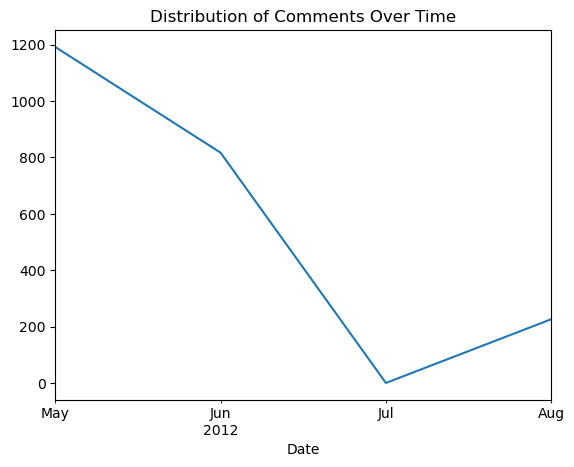

In [23]:
valid_date_data = data[data['Date'] != "Unknown"]

if not valid_date_data.empty:
    valid_date_data['Date'] = pd.to_datetime(valid_date_data['Date'])
    valid_date_data.set_index('Date').resample('M').size().plot()
    plt.title('Distribution of Comments Over Time')
    plt.show()

### Distribution of comments over time:

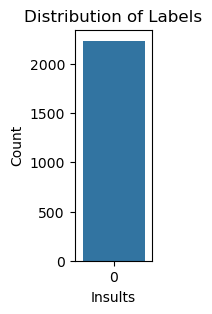

In [12]:
plt.figure(figsize=(1,3))
sns.countplot(data['Insult'])
plt.title('Distribution of Labels')
plt.xlabel('Insults')
plt.ylabel('Count')
plt.show()

### Word Cloud:

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Insulting Comments')
plt.show()

#### Display the first few rows of the DataFrame

In [13]:
print(data.head())

   id  Insult             Date  \
0   1       0  20120603163526Z   
1   2       1  20120531215447Z   
2   3       1  20120823164228Z   
3   4       1  20120826010752Z   
4   5       1  20120602223825Z   

                                             Comment        Usage  
0                 "like this if you are a tribe fan"  PrivateTest  
1              "you're idiot......................."  PrivateTest  
2  "I am a woman Babs, and the only "war on women...  PrivateTest  
3  "WOW & YOU BENEFITTED SO MANY WINS THIS YEAR F...  PrivateTest  
4  "haha green me red you now loser whos winning ...  PrivateTest  


#### Getting Info about Data

In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2234
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       2235 non-null   int64 
 1   Insult   2235 non-null   int64 
 2   Date     2235 non-null   object
 3   Comment  2235 non-null   object
 4   Usage    2235 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.3+ KB
None


#### Descriptive Statistics

In [34]:
print(data.describe())

                id       Insult
count  2235.000000  2235.000000
mean   1118.000000     0.481879
std     645.333247     0.499783
min       1.000000     0.000000
25%     559.500000     0.000000
50%    1118.000000     0.000000
75%    1676.500000     1.000000
max    2235.000000     1.000000
